# 0. Introduction

In this notebook, I am going to show how to use principal component analysis (PCA) to analyze a portfolio of stocks.
PCA is a way to reduce the number of dimensions in a data set.
It keeps the dimensions that hold the most information about the data.
There are forces that move stock prices that we can’t see. These latent factors are picked up through PCA and isolated as the principal components.
Similar stocks will be driven by similar factors. PCA makes it easy to visualize this.
The overall stock market is usually a strong driver of returns. Macroeconomic forces like interest rates and the pandemic drive returns, too. PCA lets you isolate these statistical factors to get an idea of how much the portfolio’s returns come from these unobserved features.
Applied to a portfolio, PCA isolates the statistical return drivers of a portfolio. This can further be used for hedging risk.

In [86]:
# resources:
# https://pyquantnews.com/how-to-isolate-alpha-with-analysis/

In [87]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [88]:
# If you'd like to install packages that are not installed by default, uncomment the last two lines of this cell and replace  with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere
import sys
!{sys.executable} -m pip install matplotlib numpy pandas scipy seaborn sklearn yfinance

Defaulting to user installation because normal site-packages is not writeable


In [89]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
sn.set_style('whitegrid')
import yfinance as yf
#
from sklearn.decomposition import PCA

# 1. Get the data

In [90]:
symbols = [
    'IBM',
    'MSFT',
    'META',
    'INTC',
    'NEM',
    'AU',
    'AEM',
    'GFI'
]
data = yf.download(symbols, start="2020-01-01", end="2022-11-30")
portfolio_returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  8 of 8 completed


# 2. Fit a PCA model

In [91]:
pca = PCA(n_components=3)
pca.fit(portfolio_returns)
#obtain components
pct = pca.explained_variance_ratio_
pca_components = pca.components_

# 3. Visualize the components

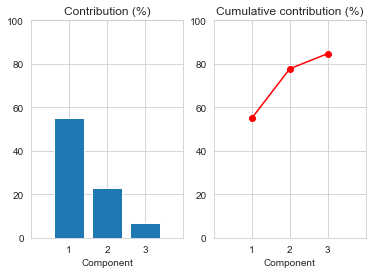

In [92]:
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)

fig, axs = plt.subplots(1, 2, figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.show()
plt.close()

# 4. Isolate the alpha factors

In [93]:
# We calculate how much of that day’s portfolio return is a result of each of the three factors.
X = np.asarray(portfolio_returns)

factor_returns = X.dot(pca_components.T)

factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], 
    index=portfolio_returns.index,
    data=factor_returns
)

factor_returns.head()

,f1,f2,f3
Date,,,
2020-01-03,-0.011794,0.015824,-0.007090
2020-01-06,0.009480,-0.010078,-0.013161
2020-01-07,-0.006960,0.009891,-0.008298
2020-01-08,-0.074473,-0.031461,-0.002840
2020-01-09,-0.012221,-0.023795,-0.001387


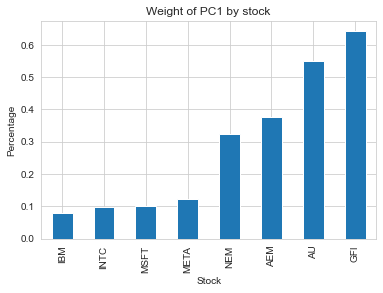

In [94]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"], 
    columns=portfolio_returns.columns,
    data = pca_components
).T

fig = plt.figure(figsize = (6, 4))
factor_exposures.f1.sort_values().plot.bar()
plt.xlabel('Stock')
plt.ylabel('Percentage')
plt.title('Weight of PC1 by stock')
plt.show()
plt.close()

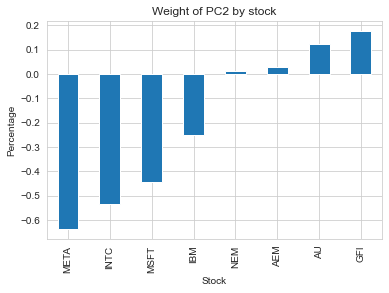

In [95]:
fig = plt.figure(figsize = (6, 4))
factor_exposures.f2.sort_values().plot.bar()
plt.xlabel('Stock')
plt.ylabel('Percentage')
plt.title('Weight of PC2 by stock')
plt.show()
plt.close()

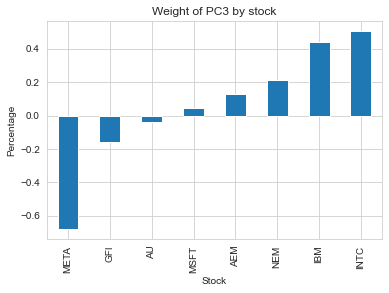

In [96]:
fig = plt.figure(figsize = (6, 4))
factor_exposures.f3.sort_values().plot.bar()
plt.xlabel('Stock')
plt.ylabel('Percentage')
plt.title('Weight of PC3 by stock')
plt.show()
plt.close()

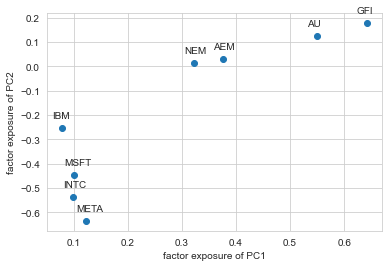

In [97]:
labels = factor_exposures.index
data = factor_exposures.values

fig = plt.figure(figsize = (6, 4))
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-10, 10),
        textcoords='offset points',
#         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )
plt.show()
plt.close()

Above, we can see how the stocks are driven by the first two principal components. Gold stocks were largely driven by factor one and tech stocks were negatively driven by factor two.
This analysis covered the time period during covid. Gold stocks were bid up strongly as a hedge against inflation and uncertainty. You might consider the first factor as a “covid factor” representing uncertainty across the market. Tech stocks crashed as worries of economic health began.

# 5. Repeat exercise for the whole 2022 year.

The hypothesis is that tech stocks crashed while Oil stocks went up during 2022 due to the high readings of inflation. Let's see what PCA finds.

In [98]:
# get the data
symbols = [
    'IBM',
    'MSFT',
    'NFLX',
    'INTC',
    'BP',
    'XOM',
    'OXY',
    'PXD'
]
data = yf.download(symbols, start="2020-01-01", end="2022-11-30")
portfolio_returns = data['Adj Close'].pct_change().dropna()
# fit a PCA model
pca = PCA(n_components=3)
pca.fit(portfolio_returns)
#obtain components
pct = pca.explained_variance_ratio_
pca_components = pca.components_

[*********************100%***********************]  8 of 8 completed


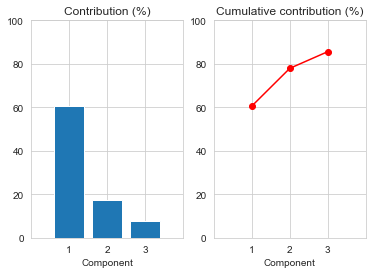

In [99]:
# visualise the components
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)

fig, axs = plt.subplots(1, 2, figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.show()
plt.close()

In [100]:
# isolate the alpha factors
# We calculate how much of that day’s portfolio return is a result of each of the three factors.
X = np.asarray(portfolio_returns)

factor_returns = X.dot(pca_components.T)

factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], 
    index=portfolio_returns.index,
    data=factor_returns
)

factor_returns.head()

,f1,f2,f3
Date,,,
2020-01-03,-0.016584,0.026598,-0.011660
2020-01-06,-0.051081,-0.011608,-0.023762
2020-01-07,0.012406,0.022280,-0.007621
2020-01-08,0.022741,-0.031552,-0.011027
2020-01-09,-0.013536,0.002713,0.013780


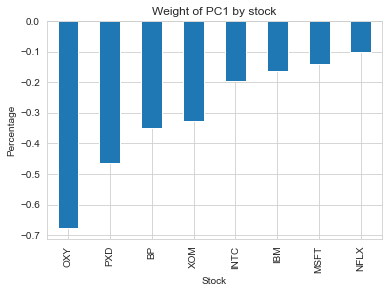

In [101]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"], 
    columns=portfolio_returns.columns,
    data = pca_components
).T

fig = plt.figure(figsize = (6, 4))
factor_exposures.f1.sort_values().plot.bar()
plt.xlabel('Stock')
plt.ylabel('Percentage')
plt.title('Factor Exposure of PC1 by stock')
plt.show()
plt.close()

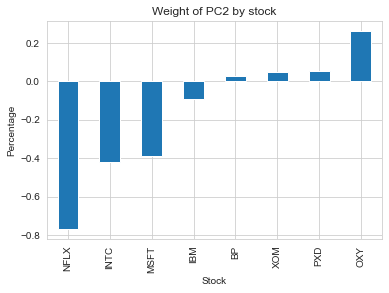

In [102]:
fig = plt.figure(figsize = (6, 4))
factor_exposures.f2.sort_values().plot.bar()
plt.xlabel('Stock')
plt.ylabel('Percentage')
plt.title('Factor Exposure of PC2 by stock')
plt.show()
plt.close()

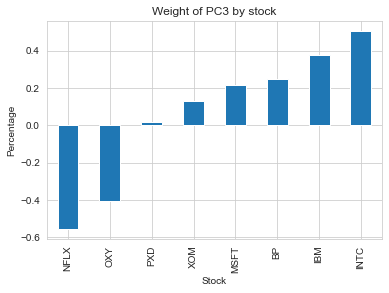

In [103]:
fig = plt.figure(figsize = (6, 4))
factor_exposures.f3.sort_values().plot.bar()
plt.xlabel('Stock')
plt.ylabel('Percentage')
plt.title('Factor Exposure of PC3 by stock')
plt.show()
plt.close()

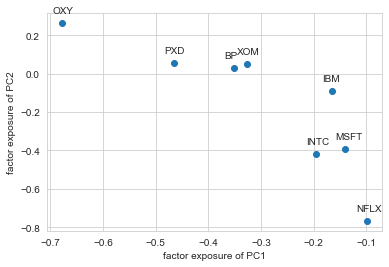

In [104]:
labels = factor_exposures.index
data = factor_exposures.values

fig = plt.figure(figsize = (6, 4))
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-10, 10),
        textcoords='offset points',
#         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )
plt.show()
plt.close()

Our hypothesis seems to hold in the data. 
Above, we can see how the stocks are driven by the first two principal components. Oil stocks were negatively driven by factor one and tech stocks were negatively driven by factor two. Oil stocks were bid up strongly as a hedge against inflation.